In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib.ticker as mattick

In [2]:
sieve=np.genfromtxt("sieve.txt", delimiter='\t')
turbidity=np.genfromtxt("turbidity.txt",delimiter='\t')
port_height=np.genfromtxt("ports.txt",delimiter='\t')
p_drop=np.genfromtxt("p drop.txt",delimiter='\t')
filter2statics=np.genfromtxt("filter2statics.txt",delimiter='\t')
filter3statics=np.genfromtxt("filter3statics.txt",delimiter='\t')
c_sand=sieve[:8,:]
f_sand=sieve[8:14,:]
c_anth=sieve[14:20,:]
f_anth=sieve[20:,:]


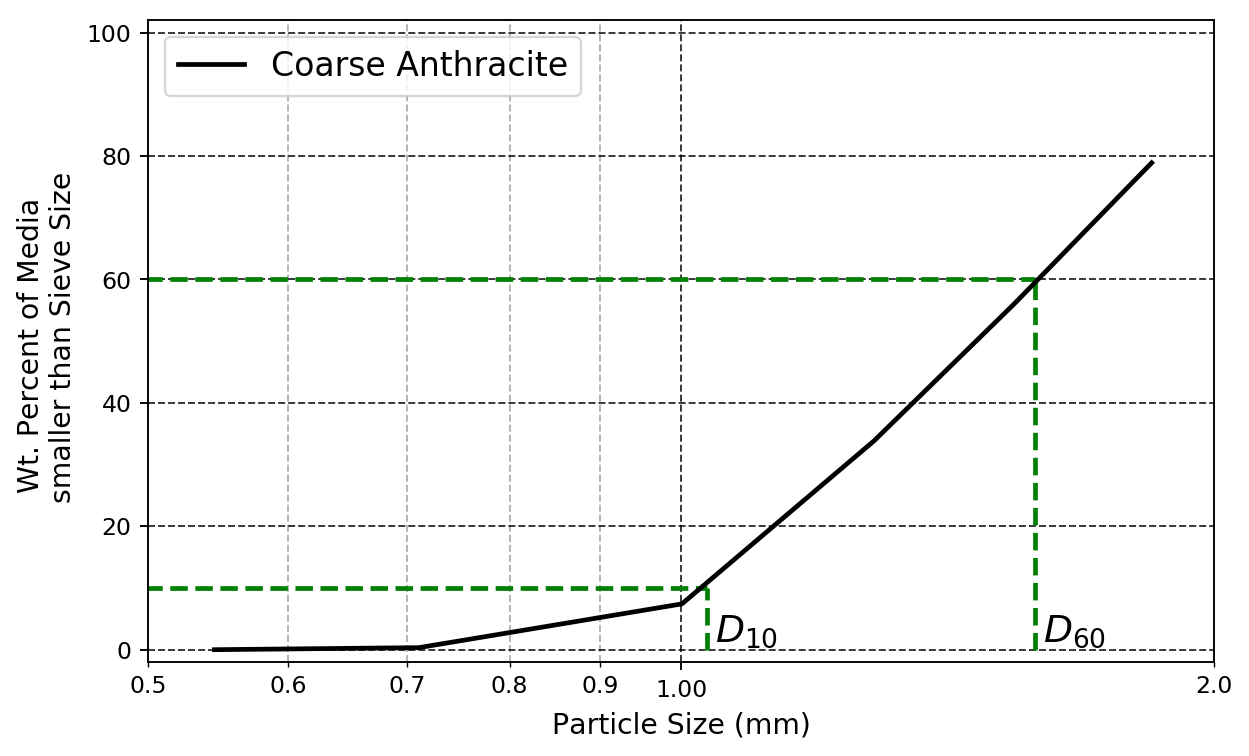

In [3]:
colors=['#17becf','#bcbd22','#7f7f7f','#e377c2','#8c564b',
       '#9467bd','#d62728','#2ca02c','#ff7f0e','#1f77b4']
fig = plt.figure(figsize=(5*1.618, 5), dpi=170)
ax=plt.subplot(111)
ax.grid(b=True, which='major', color='k', linestyle='--',alpha=0.8)
ax.grid(b=True, which='minor', color='k', linestyle='--',alpha=0.3)
ax.plot(c_anth[:,0],c_anth[:,1],label='Coarse Anthracite',color='k',linewidth=2.0)
d10=1.034116455
d60=1.584918328
ax.hlines(10,0.2,d10,'g','--',linewidth=2)
ax.hlines(60,0.2,d60,'g','--',linewidth=2)
ax.vlines(d10,0,10,'g','--',linewidth=2)
ax.vlines(d60,0,60,'g','--',linewidth=2)
ax.legend(loc='upper left',fontsize=14)
ax.set_xscale('log')
ax.set_ylim([-2, 102])
ax.set_xlim([0.5, 2])
ax.text(d60*1.01,0,'$D_{60}$',ha='left',va='bottom',fontsize=16)
ax.text(d10*1.01,0,'$D_{10}$',ha='left',va='bottom',fontsize=16)
ax.tick_params(axis='x', which='minor', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)
#ax.set_xticks([0.2,0.4,0.6,0.8,1,2]),
ax.get_xaxis().set_major_formatter(mattick.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(mattick.ScalarFormatter())
ax.set_xlabel('Particle Size (mm)',fontsize=12)
ax.set_ylabel('Wt. Percent of Media \n smaller than Sieve Size',fontsize=12)
fig.savefig('sieve Analysis.png',bbox_inches="tight")

In [4]:
filter_vol=np.zeros((6,4))
for i in range(6):
    filter_vol[i,:]=[i*10*0.5]
filter_vol[0,3]=2*0.5

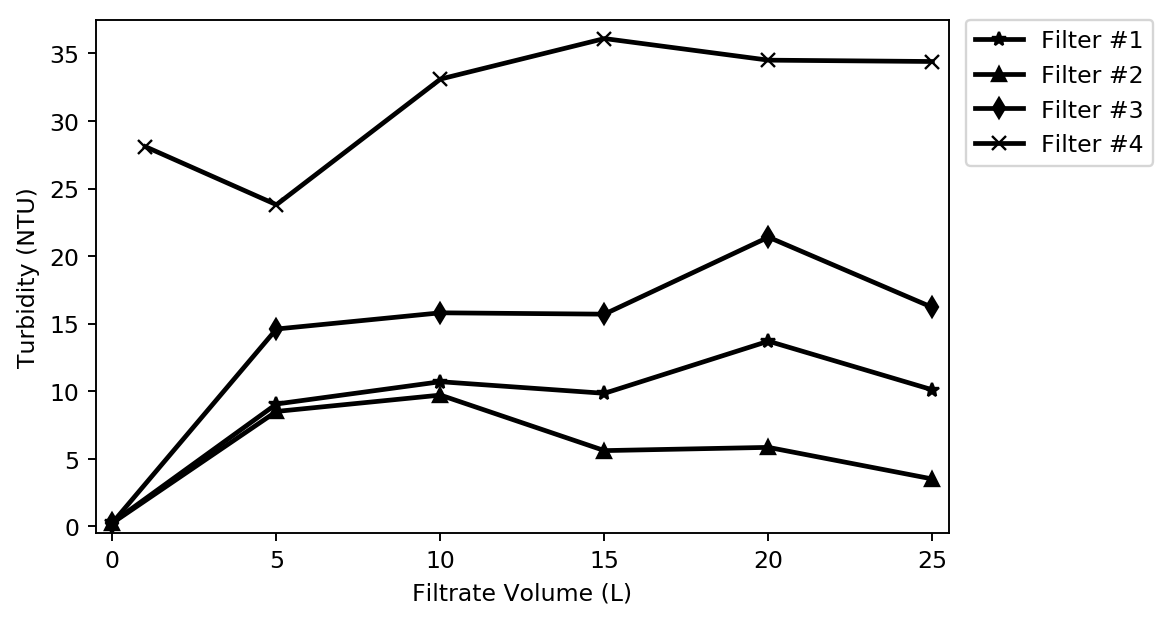

In [5]:
fig = plt.figure(figsize=(4*1.618, 4), dpi=170)
markers=['*','^','d','x']
labels=['Filter #1','Filter #2','Filter #3','Filter #4']
for i in range(4):
    plt.plot(filter_vol[:,i],turbidity[:,i],color='k',marker=markers[i],label=labels[i],linewidth=2)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel('Filtrate Volume (L)')
plt.ylabel('Turbidity (NTU)')
plt.xlim([-0.5,25.5])
plt.ylim([-0.5,37.5])
fig.savefig('turbidity.png',bbox_inches="tight")

## pressure drop visualization

In [6]:
water_level=port_height[4,:]
port_height=port_height[:4,:]

In [7]:
port_height=port_height/100

In [8]:
static_h=np.array([1.461,1.447,1.455,1.453])

In [9]:
p_droprel=np.zeros((p_drop.shape))
for i in range(4):
    p_droprel[i*6:(i+1)*6,:]=static_h[i]-p_drop[i*6:(i+1)*6,:]


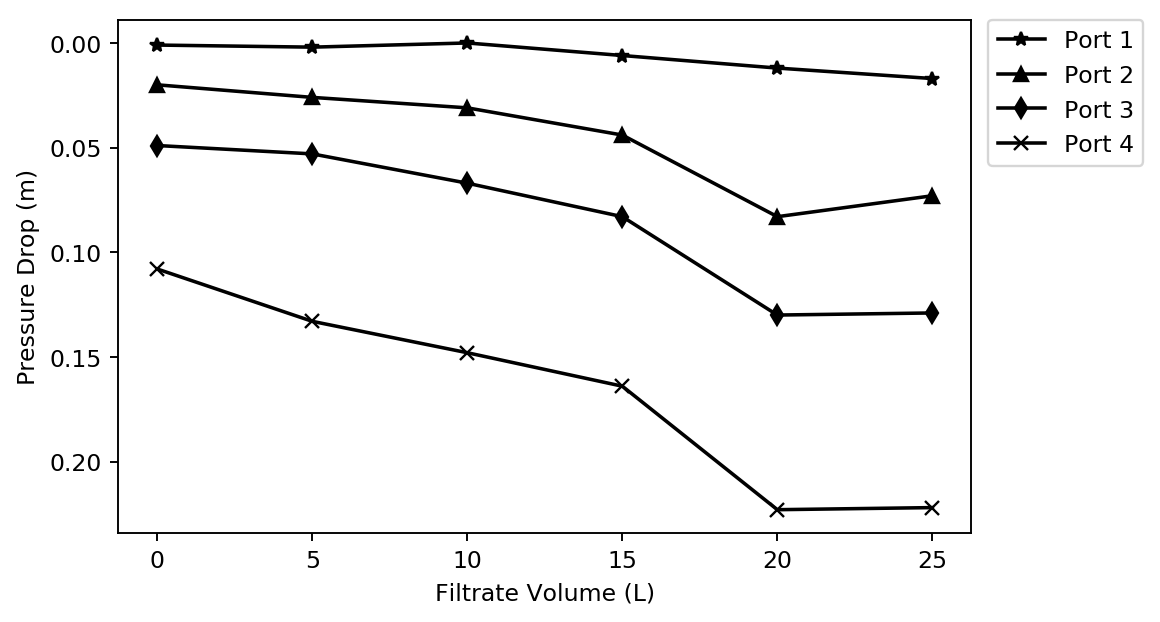

In [10]:
#filter 1
fig = plt.figure(figsize=(4*1.618, 4), dpi=170)
labels=['Port 1','Port 2','Port 3','Port 4']
for i in range(4):
    plt.plot(filter_vol[:,0],p_droprel[:6,i],color='k',label=labels[i],marker=markers[i])

plt.gca().invert_yaxis()    
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel('Filtrate Volume (L)')
plt.ylabel('Pressure Drop (m)')
fig.savefig('p_drop_1.png',bbox_inches="tight")

In [11]:
filter_vol

array([[  0.,   0.,   0.,   1.],
       [  5.,   5.,   5.,   5.],
       [ 10.,  10.,  10.,  10.],
       [ 15.,  15.,  15.,  15.],
       [ 20.,  20.,  20.,  20.],
       [ 25.,  25.,  25.,  25.]])

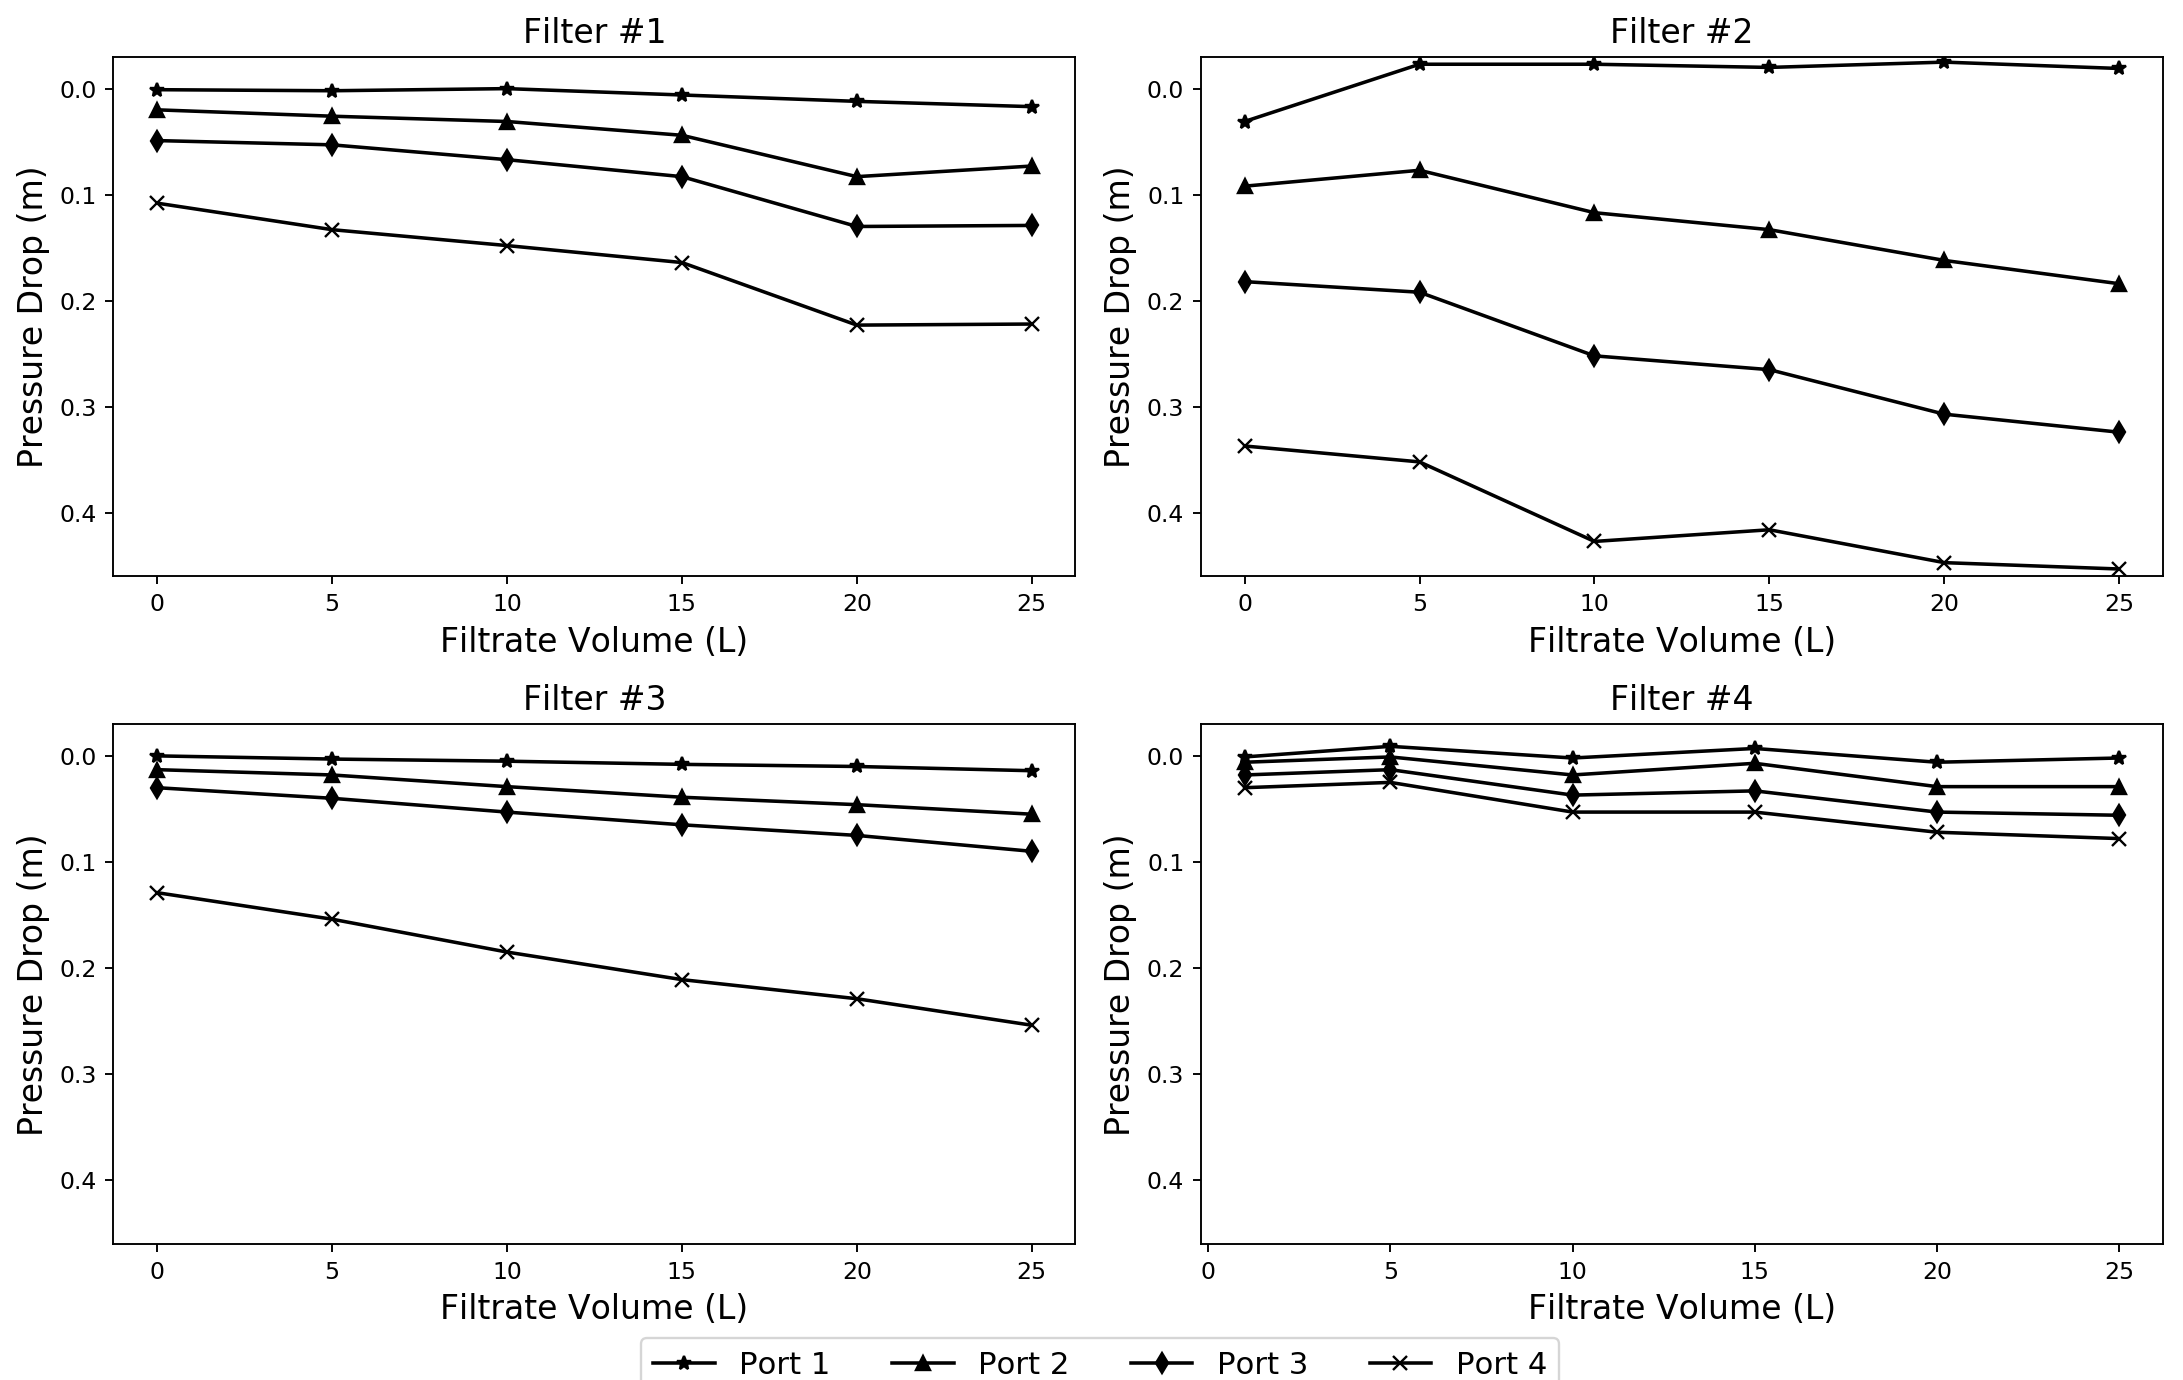

In [12]:
fig = plt.figure(figsize=(8*1.618, 8), dpi=170)
labels=['Port 1','Port 2','Port 3','Port 4']
titles=['Filter #1','Filter #2','Filter #3','Filter #4',]
for j in range(4):
    ax=plt.subplot(2,2,j+1)
    ax.set_title(titles[j],fontsize=14)
    for i in range(4):
        ax.plot(filter_vol[:,j],p_droprel[j*6:(j+1)*6,i],color='k',label=labels[i],marker=markers[i])
        ax.set_xlabel('Filtrate Volume (L)',fontsize=14)
        ax.set_ylabel('Pressure Drop (m)',fontsize=14)
        ax.set_ylim(-0.03, 0.46)
    plt.gca().invert_yaxis() 
    #plt.tight_layout()

fig.tight_layout()

plt.figlegend(loc = 'lower center', ncol=4, labelspacing=0.,fontsize=13 ,bbox_to_anchor=(0.5,-0.02))

fig.savefig('p_drop_all.png',bbox_inches="tight")

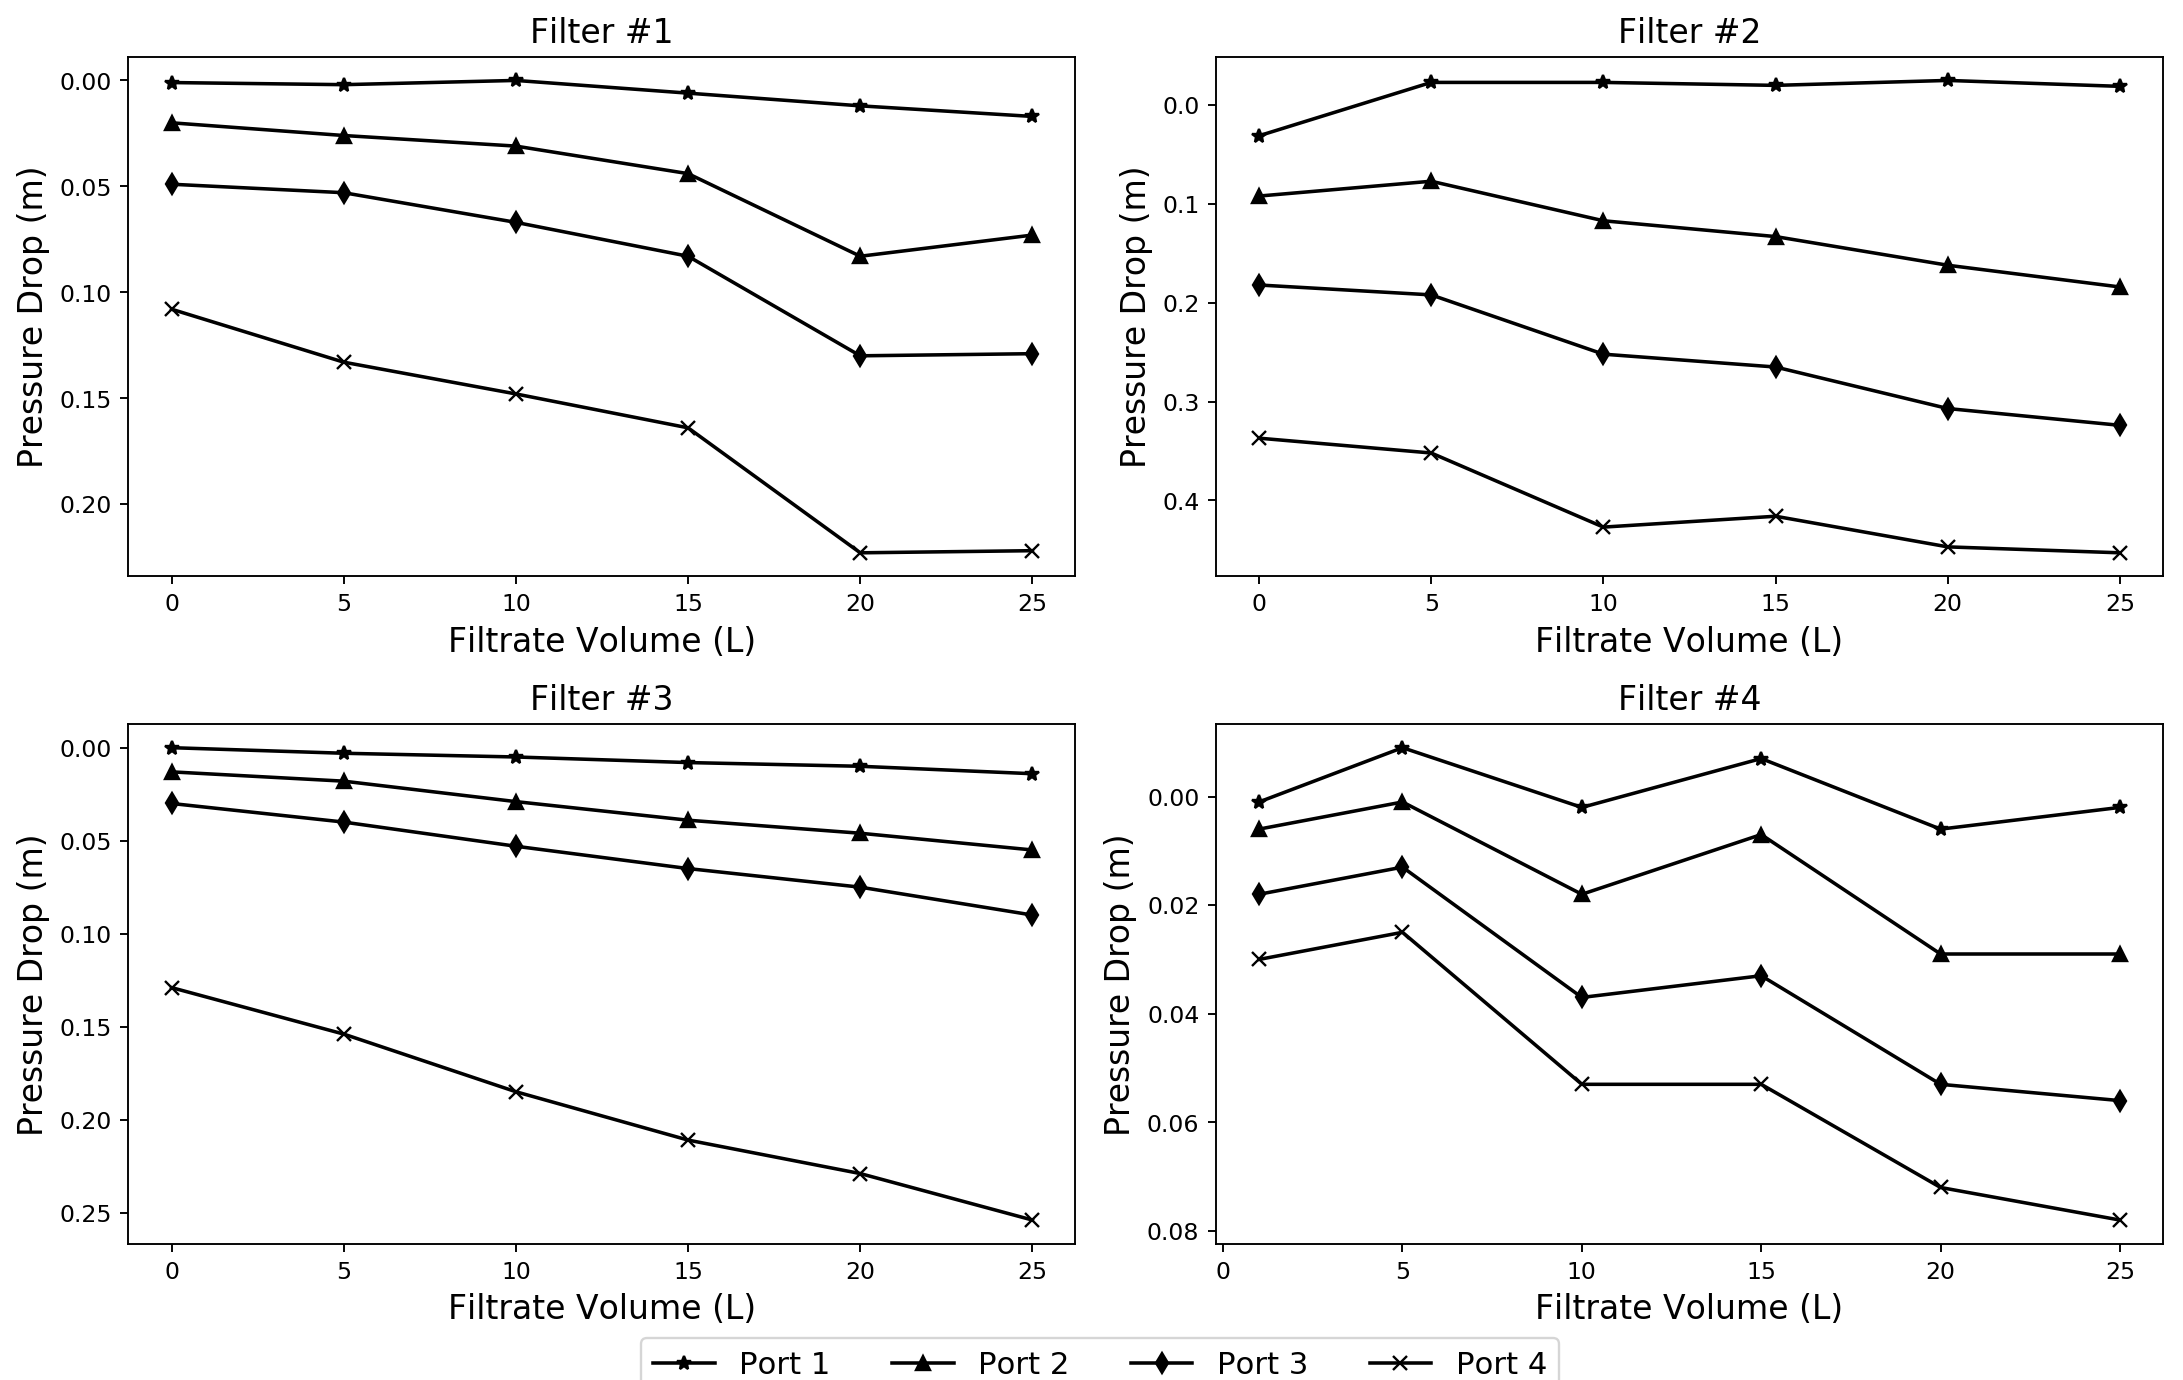

In [13]:

fig = plt.figure(figsize=(8*1.618, 8), dpi=170)
labels=['Port 1','Port 2','Port 3','Port 4']
titles=['Filter #1','Filter #2','Filter #3','Filter #4',]
for j in range(4):
    ax=plt.subplot(2,2,j+1)
    ax.set_title(titles[j],fontsize=14)
    for i in range(4):
        ax.plot(filter_vol[:,j],p_droprel[j*6:(j+1)*6,i],color='k',label=labels[i],marker=markers[i])
        ax.set_xlabel('Filtrate Volume (L)',fontsize=14)
        ax.set_ylabel('Pressure Drop (m)',fontsize=14)
    plt.gca().invert_yaxis() 
    #plt.tight_layout()

fig.tight_layout()

plt.figlegend(loc = 'lower center', ncol=4, labelspacing=0.,fontsize=13 ,bbox_to_anchor=(0.5,-0.02))

fig.savefig('p_drop_all_alt.png',bbox_inches="tight")

In [14]:
max_pdrop=np.zeros((4))
for j in range(4):
    max_pdrop[j]=p_droprel[j*6:(j+1)*6,:].max()

In [15]:
turbidity_removal=(141-turbidity[-1,:])/141*100

In [16]:
turbidity_removal

array([ 92.83687943,  97.5177305 ,  88.5106383 ,  75.60283688])

In [17]:
max_pdrop

array([ 0.223,  0.453,  0.254,  0.078])

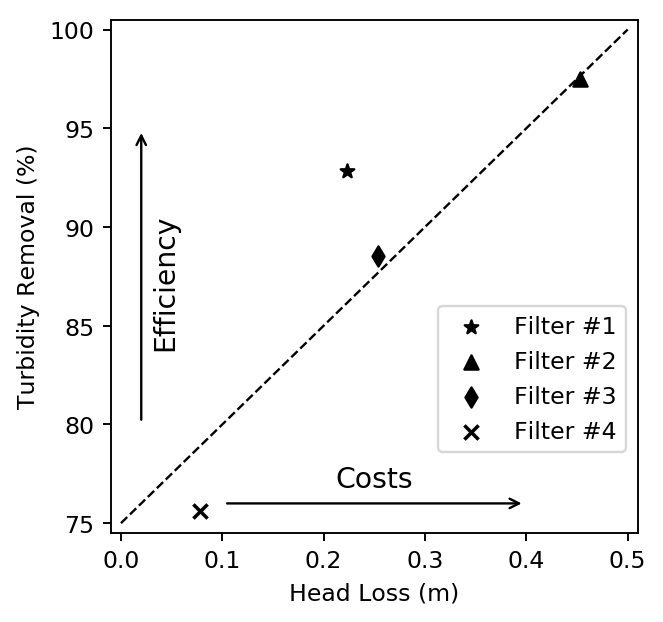

In [18]:
fig = plt.figure(figsize=(4, 4), dpi=170)
markers=['*','^','d','x']
labels=['Filter #1','Filter #2','Filter #3','Filter #4']
plt.plot([0,0.5],[75,100],'k',linestyle='--',linewidth=1);
for i in range(4):
    plt.scatter(max_pdrop[i],turbidity_removal[i],marker=markers[i],label=labels[i],color='k')
plt.xlim([-0.01,0.51]);
plt.ylim([74.5,100.5]);
plt.yticks([75,80,85,90,95,100])
plt.ylabel('Turbidity Removal (%)')
plt.xlabel('Head Loss (m)')
plt.annotate("",xy=(0.4, 76), xycoords='data',xytext=(0.1, 76), textcoords='data',
            arrowprops=dict(arrowstyle="->",color='k',alpha=1,connectionstyle="arc3"))
plt.annotate("",xy=(0.02, 95), xycoords='data',xytext=(0.02, 80), textcoords='data',
            arrowprops=dict(arrowstyle="->",color='k',alpha=1,connectionstyle="arc3"))
plt.text(0.25,76.5,'Costs',ha='center',va='bottom',fontsize=12)
plt.text(0.03,87.2,'Efficiency',ha='left',va='center',rotation=90,fontsize=12)
plt.legend(loc='center right',bbox_to_anchor=(1,0.3))
fig.savefig('perform.png',bbox_inches="tight")

## Shape factor calculations
$\Delta p=\frac{150}{\rho g}\mu L\frac{1}{\Phi^2d^2}\frac{(1-e)^2}{e^3}V_s$

In [19]:
# start with filter 2 fine sand
p_droprel.shape
delta_p=0.306
l=0.17
rho=1000
g=9.81
mu=1.1223e-3
por=0.37
flowrate=0.5/1000/60
area=np.pi*(6.35/100)**2/4
vs=flowrate/area
sum_d2=2.0974*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 0.6420940727865732


In [20]:
#filter 1 fine sand
delta_p=0.059
l=9/100
por=0.37
sum_d2=2.0974*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 1.0639719102785


In [21]:
#filter 3 fine sand
delta_p=0.099
l=8.5/100
por=0.37
sum_d2=2.0974*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 0.7982276715113092


In [22]:
#filter 4 coarse sand
delta_p=0.012
l=9/100
por=0.41
sum_d2=0.5136*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 0.9372936701130863


In [23]:
#filter 1 fine anthracite
delta_p=0.019
l=9.2/100
por=0.43
sum_d2=1.3329*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 1.0913005844161183


In [24]:
#filter 3 coarse anthracite
delta_p=0.019
l=10.5/100
por=0.44
sum_d2=0.7073*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 0.8060927380277482


In [25]:
#filter 4 coarse anthracite
delta_p=0.017
l=10/100
por=0.44
sum_d2=0.7073*1e6
phi2=(150/rho/g)*(mu*l)*((1-por)**2/por**3)*vs*sum_d2/delta_p
phi=phi2**0.5
print('Vs=',vs*1000)
print(r'Phi=',phi)

Vs= 2.63136698851998
Phi= 0.8316540349339197


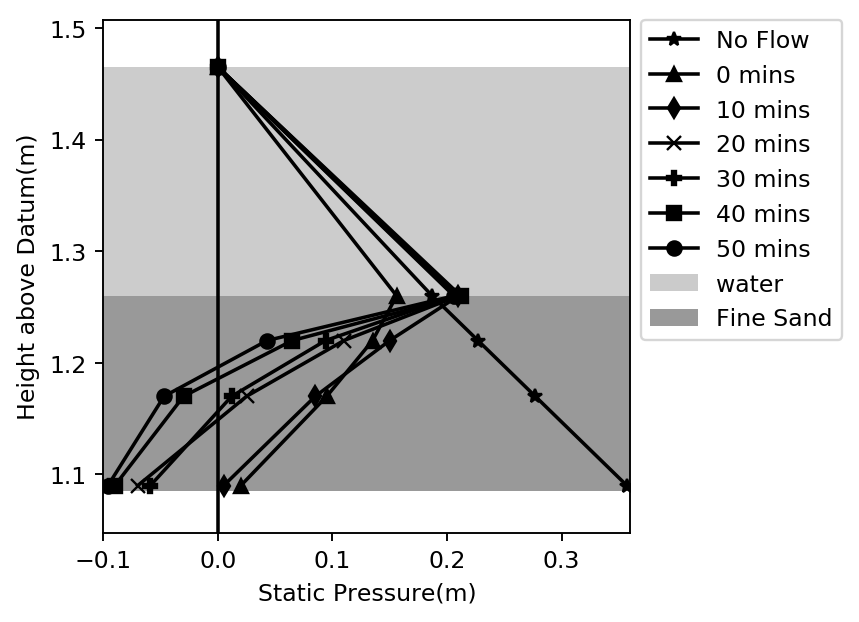

In [30]:
#filter 2 Statics
f2height=np.array([1.465,1.26,1.22,1.17,1.09])
fig = plt.figure(figsize=(4, 4), dpi=170)
#5C5B5D
plt.axhspan(1.26, 1.465, facecolor='k', alpha=0.2,label='water')
plt.axhspan(1.085, 1.26, facecolor='k', alpha=0.4,label='Fine Sand')

markers=['*','^','d','x','P','s','o']
labels=['No Flow','0 mins','10 mins','20 mins','30 mins','40 mins','50 mins']
for i in range(7):
    plt.plot(filter2statics[:,i],f2height,color='k',label=labels[i],marker=markers[i])
    
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.ylim([1.0475,1.5075])
plt.xlim([-0.1,0.36])
plt.ylabel('Height above Datum(m)')
plt.xlabel('Static Pressure(m)')
plt.axvline(x=0, color='k')
fig.savefig('f2static.png',bbox_inches="tight")

In [31]:
(1.47+1.085)
print(2.555/2-0.46/2)
print(2.555/2+0.46/2)


1.0475
1.5075


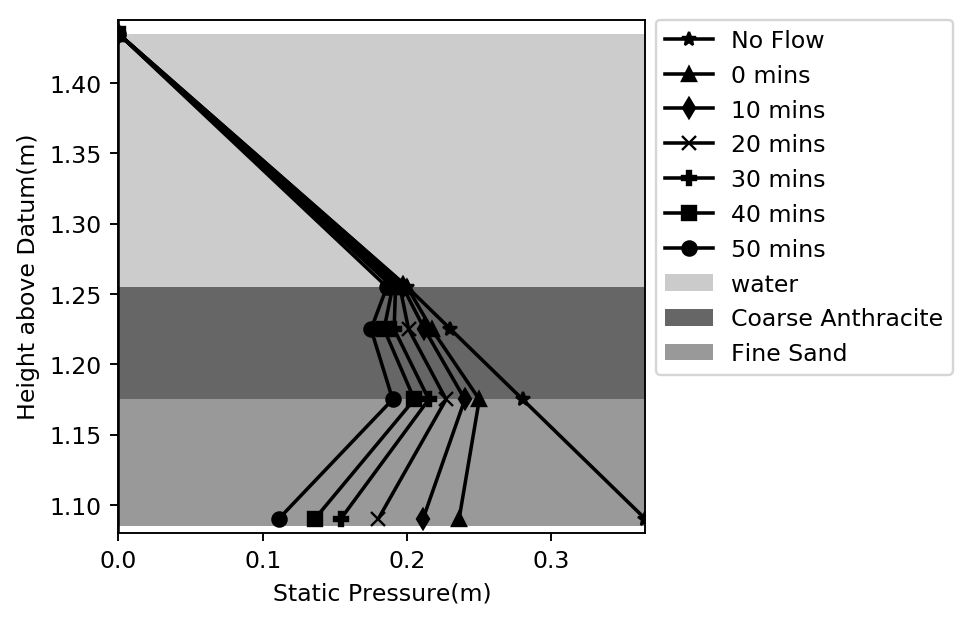

In [32]:

#filter 3 statics
f3height=np.array([1.435,1.255,1.225,1.175,1.09])
fig = plt.figure(figsize=(4, 4), dpi=170)

plt.axhspan(1.255, 1.435, facecolor='k', alpha=0.2,label='water')
plt.axhspan(1.175, 1.255, facecolor='k', alpha=0.6,label='Coarse Anthracite')
plt.axhspan(1.085, 1.175, facecolor='k', alpha=0.4,label='Fine Sand')
markers=['*','^','d','x','P','s','o']
labels=['No Flow','0 mins','10 mins','20 mins','30 mins','40 mins','50 mins']
for i in range(7):
    plt.plot(filter3statics[:,i],f3height,label=labels[i],marker=markers[i],color='k')
    
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.ylim([1.08,1.445])
plt.xlim([0,0.365])
plt.ylabel('Height above Datum(m)')
plt.xlabel('Static Pressure(m)')
plt.axvline(x=0, color='k')
fig.savefig('f3static.png',bbox_inches="tight")

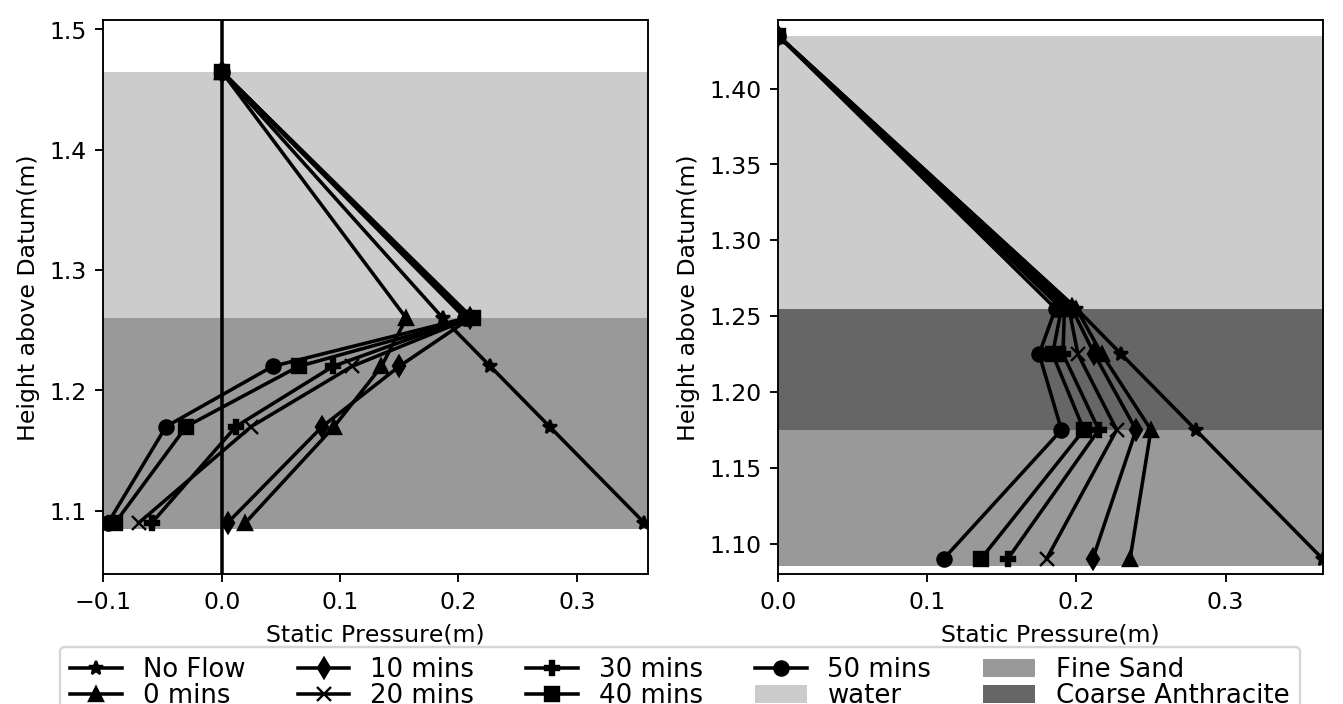

In [52]:
fig = plt.figure(figsize=(8, 4), dpi=170)
ax1 = plt.subplot(121)
#5C5B5D
ax1.axhspan(1.26, 1.465, facecolor='k', alpha=0.2,label='water')
ax1.axhspan(1.085, 1.26, facecolor='k', alpha=0.4,label='Fine Sand')

markers=['*','^','d','x','P','s','o']
labels=['No Flow','0 mins','10 mins','20 mins','30 mins','40 mins','50 mins']
for i in range(7):
    ax1.plot(filter2statics[:,i],f2height,color='k',label=labels[i],marker=markers[i])
    
#plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
ax1.set_ylim([1.0475,1.5075])
ax1.set_xlim([-0.1,0.36])
ax1.set_ylabel('Height above Datum(m)')
ax1.set_xlabel('Static Pressure(m)')
ax1.axvline(x=0, color='k')

ax2=plt.subplot(122)
ax2.axhspan(1.255, 1.435, facecolor='k', alpha=0.2,label='water')
ax2.axhspan(1.175, 1.255, facecolor='k', alpha=0.6,label='Coarse Anthracite')
ax2.axhspan(1.085, 1.175, facecolor='k', alpha=0.4,label='Fine Sand')
markers=['*','^','d','x','P','s','o']
labels=['No Flow','0 mins','10 mins','20 mins','30 mins','40 mins','50 mins']
for i in range(7):
    ax2.plot(filter3statics[:,i],f3height,label=labels[i],marker=markers[i],color='k')
    
#plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
ax2.set_ylim([1.08,1.445])
ax2.set_xlim([0,0.365])
ax2.set_ylabel('Height above Datum(m)')
ax2.set_xlabel('Static Pressure(m)')
fig.tight_layout()
plt.figlegend(loc = 'lower center', ncol=5, labelspacing=0.,fontsize=11 ,bbox_to_anchor=(0.5,-0.042))
fig.savefig('static_combine.png',bbox_inches="tight")

In [ ]:
0.45